In [61]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from scipy import signal
import palettable
from astropy.time import Time
from astropy.io import ascii
from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [62]:
%matplotlib inline


In [63]:
times=np.arange(53500,61000 , 1)
#rates=5*np.sin(2*np.pi*times/280.0)+(30*np.sin(2*np.pi*times/7+60))+(50*np.sin(2*np.pi*times/17+60))#+(5*np.sin(0.6790*times))+np.sin(.009*times+7500)+np.sin(.03*times+750)
rates= signal.sawtooth(2 * np.pi  * times/280)
#jmax=10
#for j in range(0,jmax):
   
#    g_third=len(rates)/jmax

 #   if j==0:

  #      rates[j:g_third]=0.1*rates[0:g_third]
   # else:
    #    p=0.1*j

     #   rates[j*g_third:(j+1)*g_third]=p*rates[j*g_third:(j+1)*g_third]
###randomly remove some of this data
resamp=np.random.randint(len(times), size=4800)
print resamp.shape



sine_rates=np.delete(rates, resamp)
del_times=np.delete(times, resamp)
#g_null=np.where(sine_rates<0)

#sine_rates=np.delete(sine_rates, g_null)
#del_times=np.delete(del_times, g_null)
print sine_rates.shape




(4800,)
(3982,)


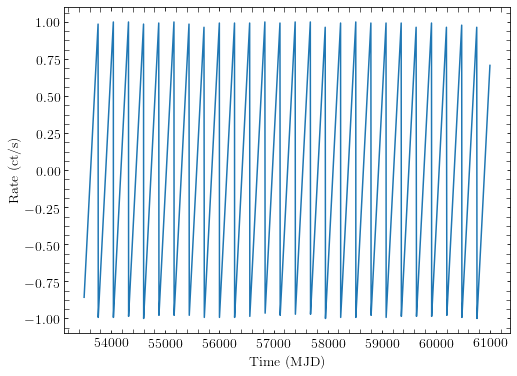

In [64]:
plt.figure(figsize=(8,6))
plt.plot(del_times, sine_rates)
plt.minorticks_on()                                                              # To plot minor ticks
plt.tick_params(axis='both', which='major', labelsize=14)                        # To set tick label fontsize
plt.tick_params(axis='both', which='maor', length=9)                            # To set tick size
plt.tick_params(axis='both', which='minor', length=4.5)                          # To set tick size
plt.tick_params(axis='both', which='both',direction='in',right=True, top=True)   # To plot ticks inwards instead of out
plt.xlim()
plt.xlabel('Time (MJD)', fontsize=14)
plt.ylabel('Rate (ct/s)', fontsize=14);

In [65]:

formatted_time= Time((del_times),format='mjd',out_subfmt='date_hms').isot
formatted_data = Table([formatted_time,sine_rates],names=['ds','y']).to_pandas()

In [66]:
df = formatted_data

df_train=df[0:3500]
df_test=df[3500:]   # Note that element 3000 will be in df_train, but not in df_test (no need for 3001 instead of it)

In [67]:
m = Prophet(yearly_seasonality=False, weekly_seasonality=False,seasonality_mode='additive',changepoint_prior_scale=.1)
#m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.add_seasonality(name='test', period=280, fourier_order=5)
m.add_seasonality(name='test2', period=7, fourier_order=5)
m.add_seasonality(name='test3', period=17, fourier_order=5)

m.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future = m.make_future_dataframe(periods=665)

future.tail()

,ds
4160,2025-03-19
4161,2025-03-20
4162,2025-03-21
4163,2025-03-22
4164,2025-03-23


In [69]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
4160,2025-03-19,0.519573,0.273338,0.772477
4161,2025-03-20,0.436640,0.188589,0.659902
4162,2025-03-21,0.392562,0.153286,0.631725
4163,2025-03-22,0.320099,0.073687,0.559976
4164,2025-03-23,0.226595,-0.033947,0.463779


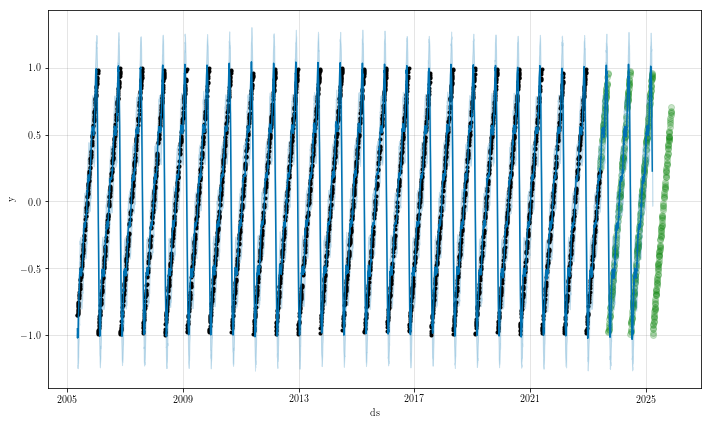

In [70]:
#plt.figure()
m.plot(forecast);
plt.plot_date(Time(del_times,format='mjd',out_subfmt='date_hms').datetime[3501:], sine_rates[3501:], 'go', zorder=0, alpha=0.2)



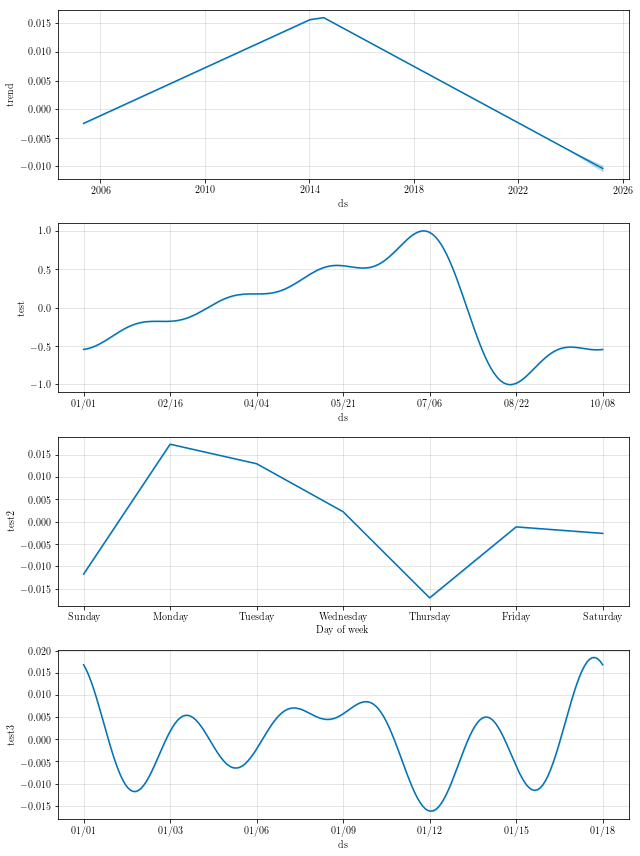

In [71]:

fig = m.plot_components(forecast)

(732076.0, 732594.0)

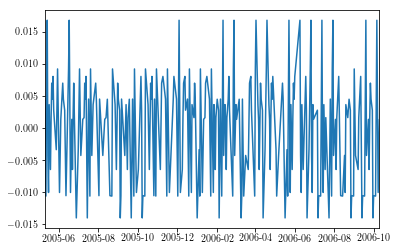

In [80]:
plt.plot(forecast['ds'],forecast['test3'])
plt.xlim(forecast['ds'][0], forecast['ds'][280])